In [ ]:
#https://github.com/gouravdidwania/Song-Popularity-Prediction

# Importing the data from github CSV

In [1]:
#importing libraries
import pandas as pd
import time

In [2]:
#assigning to dataframe
total = pd.read_csv('https://raw.githubusercontent.com/HipsterVizNinja/random-data/main/Music/hot-100/Hot%20100.csv')

## Looking at the data

In [3]:
#look at top of data
total.head(2)

,chart_position,chart_date,song,performer,song_id,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,chart_debut,chart_url
0,84,1990-05-05,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,1,NaN,NaN,84,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
1,78,1990-05-12,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,2,1.0,84.0,78,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...


Chart URL and song ID can be dropped as these are not needed

In [284]:
#dropping columns
total.drop(columns = ['chart_url', 'song_id'], inplace = True)

Finding earliest chart date and checking nulls

In [16]:
min(total['chart_date'])

'1958-08-02'

In [18]:
total.isnull().sum()

chart_position           0
chart_date               0
song                     0
performer                0
instance                 0
time_on_chart            0
consecutive_weeks    33128
previous_week        33128
peak_position            0
worst_position           0
chart_debut              0
dtype: int64

Adding a new column to see if a song is making its debut in this entry

In [286]:
#empty list to append values to
isnew = []
# 1 if song is new, 0 if not
for i in range(len(total['chart_debut'])):
    if total['chart_debut'][i] == total['chart_date'][i]:
        isnew.append(1)
    else:
        isnew.append(0)
#adding this column to the dataframe
total['is_new'] = isnew

Altering the data types

In [287]:
#changing data types to datetime
total['chart_date'] = pd.to_datetime(total['chart_date'])
total['chart_debut'] = pd.to_datetime(total['chart_debut'])

Filtering the data to be older than 25/7/2015, when some rules changed about how long a song is in the charts for and when the chart week is.

In [291]:
#filtering from when time constraints added
data = total[total['chart_date']>='2015-07-25']
#resetting the index and dropping old index column
data.reset_index(inplace = True)
data.drop(columns = ['index'], inplace = True)

C:\Users\JasmineAlbert\AppData\Local\Temp\ipykernel_13468\1094986372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['index'], inplace = True)


Creating the peak, worst, max consecutive and total weeks for each song so they can be reduced to one entry per song

In [290]:
#creating empty list
peak = []
#setting song and artist to first one
song = data['song'][0]
artist = data['performer'][0]
#if first artist and song then append the minimum in the peak column for this song
#else change artist and song then append minimum in peak for that song
for i in range(len(data['song'])):
    if data['song'][i]== song and data['performer'][i]==artist:
        peak.append(data[data['song']==song]['chart_position'].min())
    else:
        song = data['song'][i]
        artist = data['performer'][i]
        peak.append(data[data['song']==song]['chart_position'].min())
                    

[71, 71, 71, 71, 71, 71, 71, 71, 71, 71]

In [292]:
#empty list
worst = []
weeks = []
#initialising song and artist
song = data['song'][0]
artist = data['performer'][0]
#same as above but with max of worst or weeks columns
for i in range(len(data['song'])):
    if data['song'][i]== song and data['performer'][i]==artist:
        worst.append(data[data['song']==song]['chart_position'].max())
        weeks.append(data[data['song']==song]['time_on_chart'].max())
    else:
        song = data['song'][i]
        artist = data['performer'][i]
        worst.append(data[data['song']==song]['chart_position'].max())
        weeks.append(data[data['song']==song]['time_on_chart'].max())
                    


In [293]:
#empty list
consec = []
#initialise song and artist
song = data['song'][0]
artist = data['performer'][0]
#maximum consecutive weeks
for i in range(len(data['song'])):
    if data['song'][i]== song and data['performer'][i]==artist:
        consec.append(data[data['song']==song]['consecutive_weeks'].max()+1)
    else:
        song = data['song'][i]
        artist = data['performer'][i]
        consec.append(data[data['song']==song]['consecutive_weeks'].max()+1)
                    


Dropping other columns and adding these to the dataframe

In [294]:
#drop unnecessary
dataml = data.drop(columns = ['peak_position', 'worst_position', 'consecutive_weeks', 'time_on_chart'])
#add new
dataml['peak_position'] = peak
dataml['worst_position'] = worst
dataml['total_time'] = weeks
dataml['max_consecutive'] = consec

Creating and adding the debut chart position of a song and how many times it has been in the charts

In [297]:
#empty list
debut = []
#initialise song and artist
song = dataml['song'][0]
artist = dataml['performer'][0]
# find position where is_new = 1
for i in range(len(dataml['song'])):
    if dataml['is_new'][i]==1:
        deb = dataml['chart_position'][i]
        debut.append(deb)
    else:
        debut.append(deb)
        
dataml['debut'] = debut

In [298]:
#empty list
reenter = []
#initialise song and artist
song = dataml['song'][0]
artist = dataml['performer'][0]
#same as above for number of times in the charts
for i in range(len(dataml['song'])):
    if dataml['song'][i]== song and dataml['performer'][i]==artist:
        reenter.append(data[data['song']==song]['instance'].max())
    else:
        song = dataml['song'][i]
        artist = dataml['performer'][i]
        reenter.append(data[data['song']==song]['instance'].max())


        
dataml['reentry'] = reenter
#1 if only in once, then however many times been in chart

Dropping old columns

In [305]:
#dropping old columns
dataml.drop(columns =['chart_date', 'chart_debut', 'chart_position', 'previous_week', 'is_new', 'instance'], inplace = True)

Changing the artist to remove any string after 'feat' so the data is easier to work with later when using spotify's api

In [309]:
#removing artists after 'feat'
for i in range(len(dataml['song'])):
    if 'feat' in dataml['performer'][i].lower():
        dataml['performer'][i] = dataml['performer'][i][0:dataml['performer'][i].lower().index('feat')-1]

        
        

Dropping duplicate rows so there is now one row per song

In [307]:
#drop duplicates
dataml.drop_duplicates(inplace = True)
#reset and drop old index
dataml.reset_index(inplace = True)
dataml.drop(columns = ['index'], inplace=True)
dataml.head()

,song,performer,peak_position,worst_position,total_time,max_consecutive,debut,reentry
0,$ave Dat Money,Lil Dicky,71,100,19,13.0,71,3.0
1,'Til You Can't,Cody Johnson,18,97,36,36.0,94,1.0
2,'Tis The Damn Season,Taylor Swift,39,91,2,2.0,39,1.0
3,(There's No Place Like) Home For The Holidays,Perry Como,22,47,12,5.0,41,4.0
4,...Ready For It?,Taylor Swift,4,96,19,19.0,4,1.0


Filling the null values with 1. The only null values were in max_consecutive and these were because they were only in the charts for 1 week, then droppped out

In [308]:
#filling null values in consecutive with 1
dataml.fillna(value = 1, inplace = True)

Converting to CSV to use in future instead of running this code every time

In [317]:
#save as csv
dataml.to_csv('chartsnew.csv')

# Importing data instead
## Removing songs with *

In [405]:
#read data in
dataml = pd.read_csv('chartsnew.csv', names = ['song', 'performer', 'peak_position', 'worst_position', 'total_time', 'max_consecutive', 'debut', 'reentry'])

In [406]:
#removing songs with *
#empty list
ex= []
#appending index of songs with * to list
for i in range(len(dataml['song'])):
    if '*' in dataml['song'][i]:
        ex.append(i)
#dropping songs on this index
dataml.drop(index = ex, inplace = True)

Resetting index following dropping columns

In [407]:
#reset and drop old index
dataml.reset_index(inplace = True)
dataml.drop(columns = ['index'], inplace=True)

# Using Spotipy to add data on track length, explicitness, popularity and genre

This was run in a different notebook and exported to csv to use that instead of running this every time as this took ~45 minutes to run

Importing the necessary libraries

In [1]:
#imports
import spotipy
import string
import math
import os

Inputting my username, client ID and client secret obtained using Spotify for Developers

In [ ]:
#setting up searches for spotify
Username ='ADD OWN USERNAME'
Client_id ='ADD OWN CLIENT ID'
Client_secret ='ADD OWN CLIENT SECRET'
scope = 'playlist-modify-public'
token =spotipy.SpotifyOAuth(client_id = Client_id, client_secret = Client_secret, redirect_uri ='http://localhost:3005/', scope = scope, username = Username)

Creating a spotify object

In [ ]:
#spotify object
spotifyObject= spotipy.Spotify(auth_manager=token)

Searching for a song using spotifyObject.search then extracting the track length, explicitness and popularity of the song

In [ ]:
#empty lists
track = []
explicit = []
pop = []

#searching for song, removing & or with
for i in range(len(dataml['song'])):
    if '&' in dataml['performer'][i] == True:
        result = spotifyObject.search(q  = f"{dataml['song'][i]} {dataml['performer'][i][:dataml['performer'][i].index('&')]}", offset = 0, limit = 1, type = 'track')
        track.append(result['tracks']['items'][0]['duration_ms'])
        explicit.append(result['tracks']['items'][0]['explicit'])
        pop.append(result['tracks']['items'][0]['popularity'])

    elif 'with' in dataml['performer'][i].lower() == True:
        result = spotifyObject.search(q  = f"{dataml['song'][i]} {dataml['performer'][i][:dataml['performer'][i].lower().index('with')]}", offset = 0, limit = 1, type = 'track')
        track.append(result['tracks']['items'][0]['duration_ms'])
        explicit.append(result['tracks']['items'][0]['explicit'])
        pop.append(result['tracks']['items'][0]['popularity'])
       
    else:
        result = spotifyObject.search(q  = f"{dataml['song'][i]} {dataml.performer[i]}", offset = 0, limit = 1, type = 'track')
        track.append(result['tracks']['items'][0]['duration_ms'])
        explicit.append(result['tracks']['items'][0]['explicit'])
        pop.append(result['tracks']['items'][0]['popularity'])


Adding these to the dataframe

In [ ]:
#add to dataframe
dataml['track_length'] = track
dataml['explicit'] = explicit
dataml['popularity'] = pop

Using spotifyObject.search to search for the artist to add genre to the dataframe

In [ ]:
#for genre, use if bool(result...) == False:
#empty list
genre = []
#appending genre to list - search for artist, removing , with & etc and appending 'Unknown' if no genre
for i in range(len(dataml['song'])):
    if (',' in dataml['performer'][i]) == True:
        result_artist = spotifyObject.search(q = f"{dataml['performer'][i][:dataml['performer'][i].lower().index(',')]}",offset = 0, limit =1, type='artist' )
        if bool(result_artist['artists']['items'][0]['genres']) == True:
            genre.append(result_artist['artists']['items'][0]['genres'][0]) 
        else:
            genre.append('Unknown')
    elif ('with' in dataml['performer'][i].lower()) == True:
        result_artist = spotifyObject.search(q = f"{dataml['performer'][i][:dataml['performer'][i].lower().index('with')]}",offset = 0, limit =1, type='artist' )
        if bool(result_artist['artists']['items'][0]['genres']) == True:
            genre.append(result_artist['artists']['items'][0]['genres'][0]) 
        else:
            genre.append('Unknown')
    elif ('&' in dataml['performer'][i].lower()) == True:
        result_artist = spotifyObject.search(q = f"{dataml['performer'][i][:dataml['performer'][i].lower().index('&')]}",offset = 0, limit =1, type='artist' )
        if bool(result_artist['artists']['items'][0]['genres']) == True:
            genre.append(result_artist['artists']['items'][0]['genres'][0]) 
        else:
            genre.append('Unknown')
    else:
        result_artist = spotifyObject.search(q = f"{dataml['performer'][i]}",offset = 0, limit =1, type='artist' )
        if bool(result_artist['artists']['items'][0]['genres']) == True:
            genre.append(result_artist['artists']['items'][0]['genres'][0])
        else:
            genre.append('Unknown')

In [ ]:
#adding to the dataframe
dataml['genre'] = genre

Exporting to CSV to use in this notebook and further analysis

In [ ]:
#save to csv
dataml.to_csv('withadditions.csv')

# Importing data

In [3]:
#import pandas
import pandas as pd

Importing and dropping the index column

In [152]:
#read from csv then drop unnamed column
mlapp = pd.read_csv('withadditions.csv')
mlapp.drop(columns = ['Unnamed: 0'], inplace = True)
mlapp.head()

,song,performer,peak_position,worst_position,total_time,max_consecutive,debut,reentry,track_length,explicit,popularity,genre
0,$ave Dat Money,Lil Dicky,71,100,19,13,71,3,290835,True,62,comedy rap
1,'Til You Can't,Cody Johnson,18,97,36,36,94,1,224213,False,74,contemporary country
2,'Tis The Damn Season,Taylor Swift,39,91,2,2,39,1,229840,False,66,pop
3,(There's No Place Like) Home For The Holidays,Perry Como,22,47,12,5,41,4,178293,False,68,adult standards
4,...Ready For It?,Taylor Swift,4,96,19,19,4,1,208186,False,75,pop


Categorising the genre. If pop appears in pop punk for example, then this is altered to pop. Another example is extracting rap from comedy rap in the first entry

In [153]:
# categorising the genre so pop punk become pop etc
for i in range(len(mlapp['genre'])):
    if 'pop' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'pop'
    elif 'hip hop' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'hip hop'
    elif 'rap' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'rap'
    elif 'indie' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'indie'
    elif 'rock' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'rock'
    elif 'country' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'country'
    elif 'house' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'house'
    elif 'alt' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'alt'
    elif 'r&b' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'r&b'
    elif 'drill' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'drill'
    elif 'soul' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'soul'
    elif 'dance' in mlapp['genre'][i]:
        mlapp['genre'][i] = 'dance'

C:\Users\JasmineAlbert\AppData\Local\Temp\ipykernel_22992\513062471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlapp['genre'][i] = 'rap'
C:\Users\JasmineAlbert\AppData\Local\Temp\ipykernel_22992\513062471.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlapp['genre'][i] = 'country'
C:\Users\JasmineAlbert\AppData\Local\Temp\ipykernel_22992\513062471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlapp['genre'][i] = 'p

Checking the value counts to remove any that have below 10 entries

In [154]:
#count how many in each genre
mlapp['genre'].value_counts()[0:20]

hip hop            1134
pop                1124
rap                 722
country             472
drill                85
r&b                  81
reggaeton            75
rock                 64
alt                  41
soul                 32
black americana      29
boy band             28
Unknown              27
adult standards      25
brostep              15
dance                12
edm                  12
hollywood            10
indie                10
afrofuturism          9
Name: genre, dtype: int64

Since there are many genres with less than 10 entries, those with 10+ are kept in the dataframe and the rest are dropped

In [155]:
#list of those with more than 10
top = ['hip hop', 'pop', 'rap', 'country', 'reggaeton', 'rock', 'alt', 'drill', 'r&b', 'soul', 'black americana', 'boy band', 'adult standards', 'brostep', 'dance', 'edm', 'hollywood', 'indie']

In [156]:
#filter so genre within that list
mlapp = mlapp[mlapp['genre'].isin(top)]

In [157]:
mlapp.head()

,song,performer,peak_position,worst_position,total_time,max_consecutive,debut,reentry,track_length,explicit,popularity,genre
0,$ave Dat Money,Lil Dicky,71,100,19,13,71,3,290835,True,62,rap
1,'Til You Can't,Cody Johnson,18,97,36,36,94,1,224213,False,74,country
2,'Tis The Damn Season,Taylor Swift,39,91,2,2,39,1,229840,False,66,pop
3,(There's No Place Like) Home For The Holidays,Perry Como,22,47,12,5,41,4,178293,False,68,adult standards
4,...Ready For It?,Taylor Swift,4,96,19,19,4,1,208186,False,75,pop


In [ ]:
#save to csv
#mlapp.to_csv('appendgenre.csv')

To now get this ready for machine learning, the song column needs to be removed as this is unique for every entry and performer, genre and explicit need to be label encoded. This dataframe was also exported to csv to import again when opening the notebook. The debut column should also be removed as this is the same as the peak position in a number of entries.

In [234]:
#import csv and drop index column
mlapp = pd.read_csv('appendgenre.csv')
mlapp.drop(columns =['Unnamed: 0'], inplace = True)
mlapp.head()

,song,performer,peak_position,worst_position,total_time,max_consecutive,debut,reentry,track_length,explicit,popularity,genre
0,$ave Dat Money,Lil Dicky,71,100,19,13,71,3,290835,True,62,rap
1,'Til You Can't,Cody Johnson,18,97,36,36,94,1,224213,False,74,country
2,'Tis The Damn Season,Taylor Swift,39,91,2,2,39,1,229840,False,66,pop
3,(There's No Place Like) Home For The Holidays,Perry Como,22,47,12,5,41,4,178293,False,68,adult standards
4,...Ready For It?,Taylor Swift,4,96,19,19,4,1,208186,False,75,pop


In [235]:
#count how many songs had a debut equal to the peak position
mlapp[mlapp['debut'] == mlapp['peak_position']]['performer'].count()

2293

Lots of entries where debut and peak position are the same so having this in the data while performing machine learning could affect the results

In [236]:
#dropping these variables
mlapp.drop(columns = ['song', 'debut'], inplace = True)

# Machine Learning
## Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from datetime import date, timedelta, datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

### Looking at distribution
(Removing performer as there are multiple values for this column)

We can see the data does not appear normal, specifically the 'worst', 'max_consecutive' and 'reentry' columns.

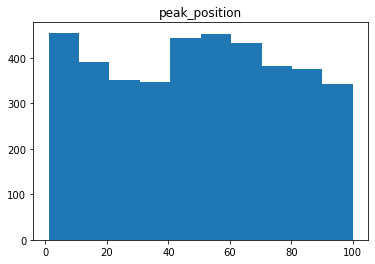

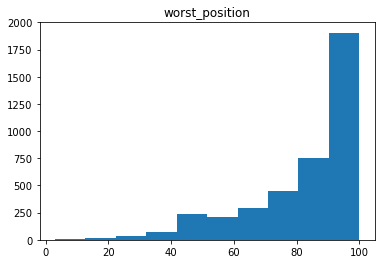

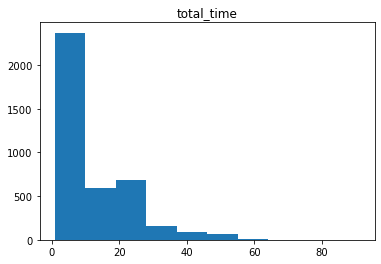

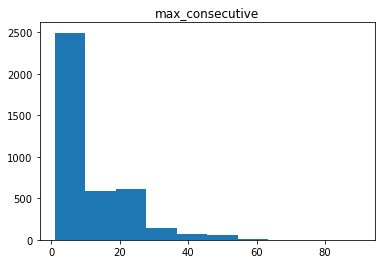

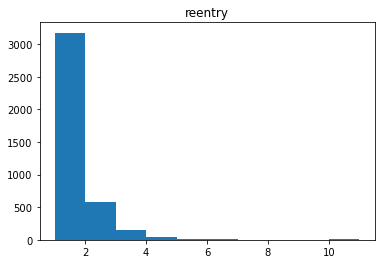

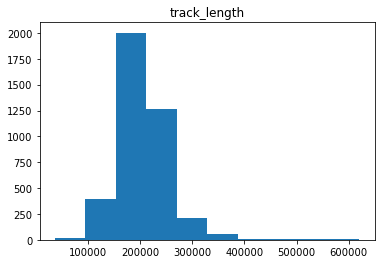

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


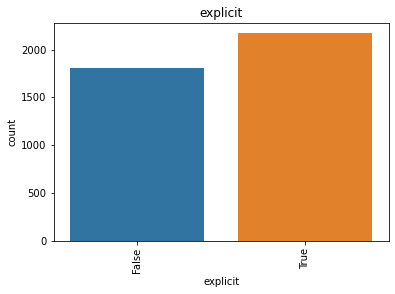

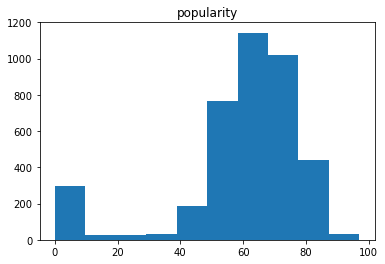

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


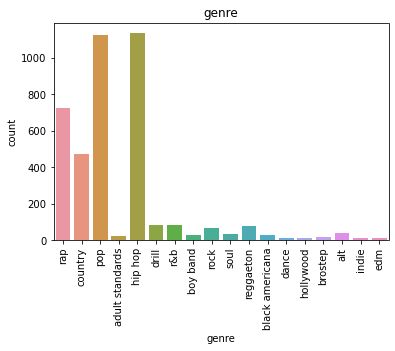

In [171]:
cat = ['explicit', 'genre']
#plotting count plots for all variables except explicit and genre to show distribution
for i in mlapp.columns:
    if i =='performer':
        pass
    elif i in cat:
        sns.countplot(mlapp[i])
        plt.title(i)
        plt.xticks(rotation = 90)
        plt.show()
    else:
        plt.hist(mlapp[i])
        plt.title(i)
        plt.show()

### Encoding the categorical variables
And plotting histograms once encoded to see the distribution of performer

In [172]:
#creating label encoder
le = LabelEncoder()
#encoding genre, performer and explicit
mlapp['genre'] = le.fit_transform(mlapp['genre'])
mlapp['performer'] = le.fit_transform(mlapp['performer'])
mlapp['explicit'] = le.fit_transform(mlapp['explicit'])

In [173]:
#looking at the data
mlapp.head()

,performer,peak_position,worst_position,total_time,max_consecutive,reentry,track_length,explicit,popularity,genre
0,595,71,100,19,13,3,290835,1,62,14
1,207,18,97,36,36,1,224213,0,74,5
2,969,39,91,2,2,1,229840,0,66,12
3,808,22,47,12,5,4,178293,0,68,0
4,969,4,96,19,19,1,208186,0,75,12


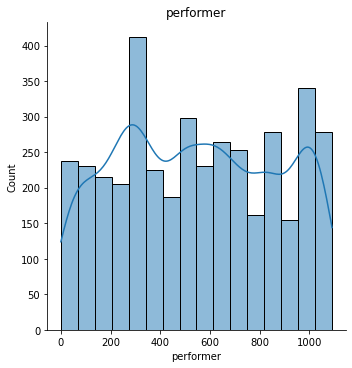

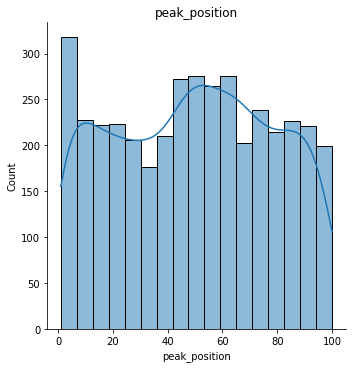

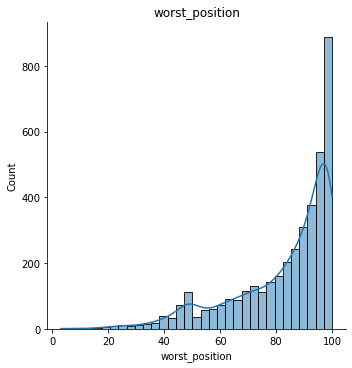

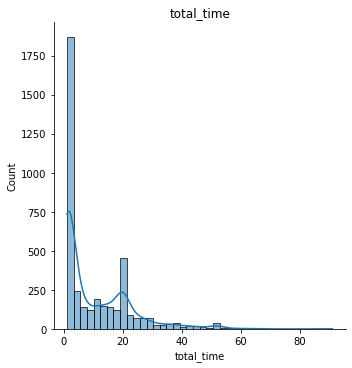

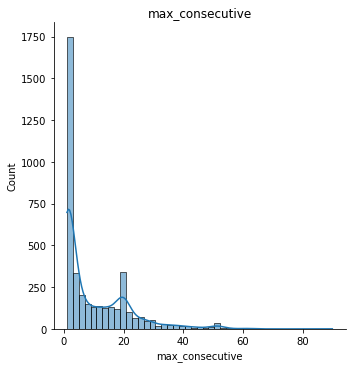

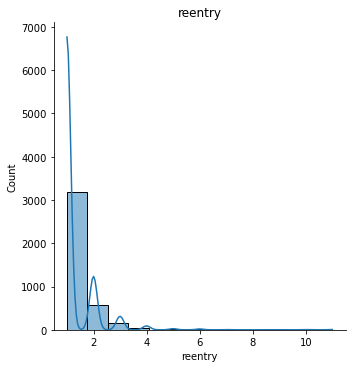

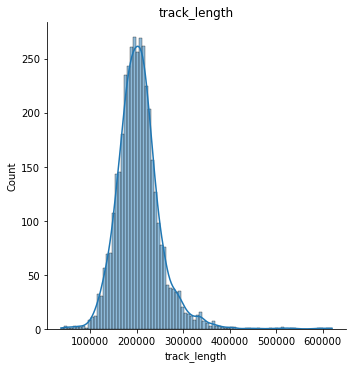

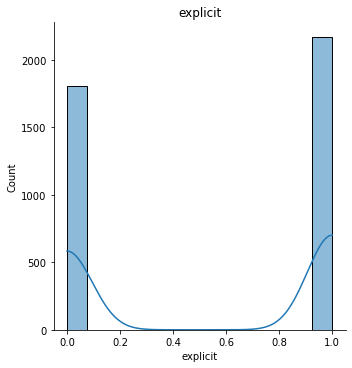

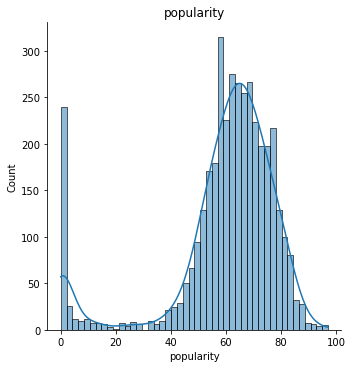

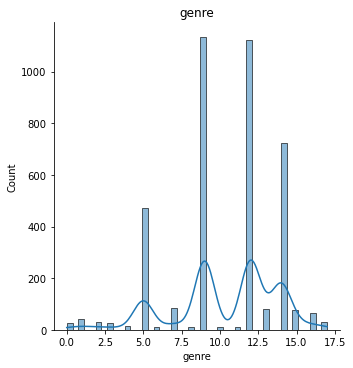

In [66]:
#displots of these new variables
for i in mlapp.columns:
    sns.displot(mlapp[i], kde= True)
    plt.title(i)
    plt.show()

### Scaling
Since this data does not appear normal, it should be scaled using normalisation (MinMaxScaler). Before this, we separate to X and y where y is the variable we want to predict first, peak position and X is all other columns. We then split to train and testing data using train_test_split.

In [67]:
#setting X and y
X = mlapp.drop(columns = 'peak_position')
y = mlapp['peak_position'].values.reshape(-1,1)
#splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [68]:
from sklearn.preprocessing import MinMaxScaler
#set scaler
scaler = MinMaxScaler()
#scale data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

## Linear regression
After checking the heatmap, we can see total time and peak position are highly negatively correlated so this will be used in linear regression

<AxesSubplot:>

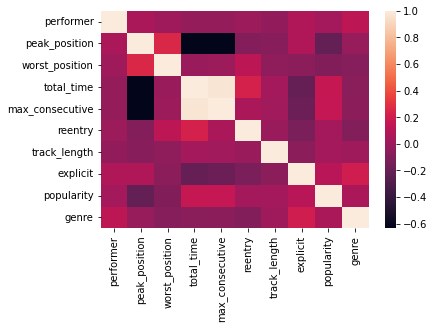

In [69]:
#look at correlation
sns.heatmap(mlapp.corr())

Creating, splitting and scaling X and y for linear regression

In [70]:
#creating X and y for linear
X_lin = mlapp['total_time'].to_numpy().reshape(-1,1)
y_lin = mlapp['peak_position'].to_numpy().reshape(-1,1)
#splitting to train and test
X_lt = X_train['total_time'].to_numpy().reshape(-1,1)
y_lt = y_train
X_ltest = X_test['total_time'].to_numpy().reshape(-1,1)
y_ltest = y_test

In [71]:
#scaling each of these
scaler = MinMaxScaler()
X_lt = scaler.fit_transform(X_lt)
X_ltest = scaler.transform(X_ltest)
y_lt = scaler.fit_transform(y_lt)
y_ltest = scaler.transform(y_ltest)
X_lin_scaled = scaler.fit_transform(X_lin)
y_lin_scaled = scaler.transform(y_lin)

Define and apply the linear regression model

In [72]:
from sklearn.linear_model import LinearRegression
#define regressor and train model
regressor = LinearRegression()
#fitting
regressor.fit(X_lt, y_lt)
#predicting
y_lin_pred = regressor.predict(X_ltest)

Plotting the training X and y against the predicted y

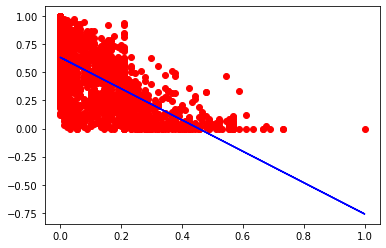

In [73]:
#plot training and prediction
plt.scatter(X_lt, y_lt, color = 'r')
plt.plot(X_lt, regressor.predict(X_lt), color = 'b')

Plotting test values and that predicted using training

Text(0, 0.5, 'Peak position')

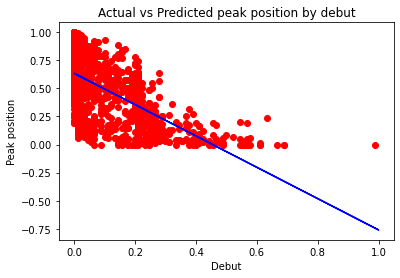

In [74]:
#plot test and prediction
plt.scatter(X_ltest, y_ltest, color = 'r')
plt.plot(X_lt, regressor.predict(X_lt), color = 'b')
plt.title('Actual vs Predicted peak position by debut')
plt.xlabel('Debut')
plt.ylabel('Peak position')

Metrics: R^2, MAE, MSE, RMSE

In [75]:
#r2 score
regressor.score(X_ltest, y_ltest)

0.4142704849353158

In [76]:
#other metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_scaled, y_lin_pred)}')
print('MSE:', metrics.mean_squared_error(y_test_scaled, y_lin_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_lin_pred)))

MAE: 0.18600587947209007
MSE: 0.05026116137271718
RMSE:  0.22419001175948314


Coefficients for the equation

In [77]:
#coef and intercepts for equation
regressor.coef_, regressor.intercept_

(array([[-1.39477971]]), array([0.63436401]))

Actual VS predicted values

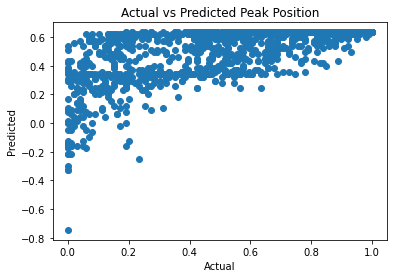

In [78]:
#actual vs predicted peak position
plt.scatter(y_test_scaled, y_lin_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Peak Position')
plt.show()

Using cross validation to find the average R^2, MAE, MSE, RMSE

In [122]:
#cross validation train and test split
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)
#metrics included in the cross val
score_metrics = ['r2','neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error']
#creating the values
score_lin_all = cross_validate(regressor, X_lin_scaled, y_lin_scaled, cv = cv, scoring = score_metrics )

## Multiple linear

Creating and training the multiple linear model

In [80]:
#define and train model
mreg  =LinearRegression()
#fitting
mreg.fit(X_train_scaled, y_train_scaled)
#predicting
y_mlpred = mreg.predict(X_test_scaled)

Plotting actual and predicted values

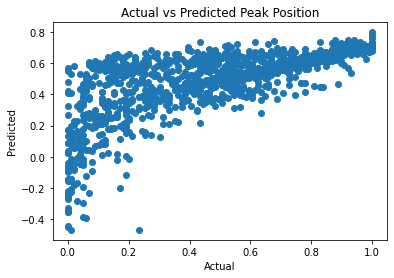

In [81]:
#plot actual and predicted peak position
plt.scatter(y_test_scaled, y_mlpred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Peak Position')
plt.show()

Metrics: R^2, MAE, MSE, RMSE

In [82]:
#r2 score
mreg.score(X_test_scaled, y_test_scaled)

0.49754054169162965

In [83]:
#other metrics
print(f'MAE: {metrics.mean_absolute_error(y_test_scaled, y_mlpred)}')
print('MSE:', metrics.mean_squared_error(y_test_scaled, y_mlpred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_scaled, y_mlpred)))

MAE: 0.17023745642329866
MSE: 0.04311579879066903
RMSE:  0.20764344148243408


Values for equation

In [84]:
#coefficients and intercept
mreg.coef_, mreg.intercept_

(array([[ 0.04324761,  0.39988735, -0.36807915, -1.05417293, -0.25842133,
         -0.07148628, -0.01823514, -0.10186662, -0.06305162]]),
 array([0.41741562]))

Cross validation - scaling X and y first

In [85]:
#scale for cross val score
#set X and y
X = mlapp.drop(columns = 'peak_position')
y = mlapp['peak_position'].values.reshape(-1,1)
#scale these
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [121]:
#perform cross val
score_ml = cross_val_score(mreg, X_scaled, y_scaled, cv=10, scoring = 'r2')
score_ml_all = cross_validate(mreg, X_scaled, y_scaled, cv = cv, scoring = score_metrics )

## Ridge regression
This does not require the scaled X and y so X_train, X_test, y_train, y_test will be used

Creating and finding the optimal alpha for the model

In [87]:
#create method
ridge = Ridge()
#use to find optimal alpha
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
grid = dict()
#alpha is 0 to 1
grid['alpha'] = np.arange(0, 1, 0.01)
search = GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)

In [88]:
#print best alpha
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -16.603
Config: {'alpha': 0.0}


Best alpha is 0
Creating and training where alpha = 0

In [90]:
#create with this alpha
ridge_opt = Ridge(alpha=0) # alpha corresponds to the penalty - closer to 1 is a bigger penalty
#fit
ridge_opt.fit(X_train, y_train)
#predict
y_ridgeopt_pred = ridge_opt.predict(X_test)



Plotting actual and predicted values

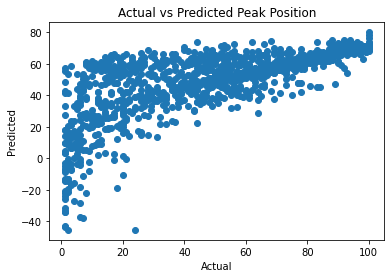

In [91]:
#plot actual and predicted peak position
plt.scatter(y_test,y_ridgeopt_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Peak Position')
plt.show()

Metrics: R^2, MAE, MSE, RMSE

In [92]:
#r2 score
ridge_opt.score(X_test, y_test)

0.4975405416916294

In [93]:
#other metrics
print(f'MAE: {metrics.mean_absolute_error(y_test, y_ridgeopt_pred)}')
print('MSE:', metrics.mean_squared_error(y_test, y_ridgeopt_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_ridgeopt_pred)))

MAE: 16.85350818590657
MSE: 422.57794394734725
RMSE:  20.556700706760978


Values for equation

In [94]:
#coef and intercept for equation
ridge_opt.coef_, ridge_opt.intercept_

(array([[ 3.92439379e-03,  4.08132447e-01, -4.04887060e-01,
         -1.17261932e+00, -2.55837119e+00, -1.21373469e-05,
         -1.80527841e+00, -1.03966964e-01, -3.67182973e-01]]),
 array([45.68486578]))

Cross validation

In [119]:
#give cross val
score = cross_val_score(ridge, X, y, cv=10, scoring = 'r2')
score_ridge_all = cross_validate(ridge, X, y, cv = cv, scoring = score_metrics )


## Lasso

This does not use the scaled data either
Creating and training the model

In [97]:
from sklearn.linear_model import Lasso
#define and train model
lasso = Lasso()
#fit model
lasso.fit(X_train, y_train)
#predict
lasso_pred = lasso.predict(X_test)

Plotting actual and predicted values

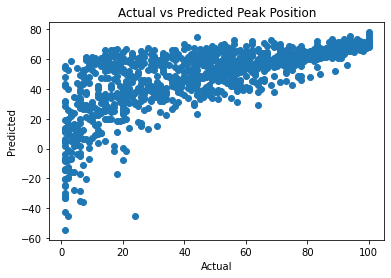

In [98]:
#plot actual and predicted 
plt.scatter(y_test, lasso_pred)
plt.title('Actual vs Predicted Peak Position')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Metrics: R^2, MAE, MSE, RMSE

In [99]:
#r2 score
lasso.score(X_test, y_test)

0.49496136876468677

In [100]:
#other metrics
print(f'MAE: {metrics.mean_absolute_error(y_test, lasso_pred)}')
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

MAE: 16.88486573787883
MSE: 424.7470773461322
RMSE:  20.609392939777052


Values for equation

In [101]:
#coef for equation
lasso.coef_, lasso.intercept_

(array([ 3.60332797e-03,  3.91194691e-01, -7.71016379e-01, -7.88988832e-01,
        -0.00000000e+00, -1.04333203e-05, -0.00000000e+00, -1.09790925e-01,
        -3.00009156e-01]),
 array([42.39463003]))

Cross validation

In [120]:
#give cross validation
score_las = cross_val_score(lasso, X, y, cv=10, scoring = 'r2')
score_las_all = cross_validate(lasso, X, y, cv = cv, scoring = score_metrics )

Multiple linear and Ridge regression performed the best out of the three

Creating a table containing all metrics

In [104]:
#separating to R^2, MAE, MSE, RMSE and methods to give as table
rscores = [np.mean(score_lin_all['test_r2']), np.mean(score_ml_all['test_r2']), np.mean(score_ridge_all['test_r2']), np.mean(score_las_all['test_r2'])]
methods = ['Linear', 'Multiple Linear', 'Ridge', 'Lasso']
maes = [abs(np.mean(score_lin_all['test_neg_mean_absolute_error'])), abs(np.mean(score_ml_all['test_neg_mean_absolute_error'])), abs(np.mean(score_ridge_all['test_neg_mean_absolute_error'])), abs(np.mean(score_las_all['test_neg_mean_absolute_error']))]
mses = [abs(np.mean(score_lin_all['test_neg_mean_squared_error'])), abs(np.mean(score_ml_all['test_neg_mean_squared_error'])), abs(np.mean(score_ridge_all['test_neg_mean_squared_error'])), abs(np.mean(score_las_all['test_neg_mean_squared_error']))]
rmses = [abs(np.mean(score_lin_all['test_neg_root_mean_squared_error'])), abs(np.mean(score_ml_all['test_neg_root_mean_squared_error'])), abs(np.mean(score_ridge_all['test_neg_root_mean_squared_error'])), abs(np.mean(score_las_all['test_neg_root_mean_squared_error']))]

evalu = pd.DataFrame(data = {
    'Type of regression': methods,
    'Mean of cross val R^2 score': rscores,
    'Mean of Mean absolute errors': maes,
    'Mean of Mean squared errors': mses,
    'Mean of Root mean squared errors': rmses
})

In [221]:
#show table
evalu

,Type of regression,Mean of cross val R^2 score,Mean of Mean absolute errors,Mean of Mean squared errors,Mean of Root mean squared errors
0,Linear,0.401381,0.203842,0.060754,0.246319
1,Multiple Linear,0.485405,0.168404,0.043152,0.207505
2,Ridge,0.485371,16.674605,422.859787,20.550977
3,Lasso,0.482522,16.752684,425.216095,20.608387


Since these are not very high scores, we can use classification instead to see in which category the peak position will be in.

## Classification
### Importing data

In [4]:
#import csv and drop index column
mlapp = pd.read_csv('appendgenre.csv')
mlapp.drop(columns =['Unnamed: 0'], inplace = True)

In [5]:
#dropping song and debut
mlapp.drop(columns = ['song', 'debut'], inplace = True)

In [8]:
#create label encoder
le = LabelEncoder()
#label encode same as above
mlapp['genre'] = le.fit_transform(mlapp['genre'])
mlapp['performer'] = le.fit_transform(mlapp['performer'])
mlapp['explicit'] = le.fit_transform(mlapp['explicit'])

### Creating categories

Song in top 25 or bottom 75

In [9]:
top25 = range(1,26)
to100 = range(26,101)
#empty list
peak_range = []
#if peak in top 25 0, else 1
for i in range(len(mlapp['peak_position'])):
    if mlapp['peak_position'][i] in top25:
        peak_range.append(0)
    elif mlapp['peak_position'][i] in to100:
        peak_range.append(1)

Adding peak range and removing peak position column

In [10]:
#add to data and remove old
mlapp['peak_range'] = peak_range
mlapp.drop(columns = 'peak_position', inplace = True)
mlapp.head()

,performer,worst_position,total_time,max_consecutive,reentry,track_length,explicit,popularity,genre,peak_range
0,595,100,19,13,3,290835,1,62,14,1
1,207,97,36,36,1,224213,0,74,5,0
2,969,91,2,2,1,229840,0,66,12,1
3,808,47,12,5,4,178293,0,68,0,0
4,969,96,19,19,1,208186,0,75,12,0


Showing histogram of peak range to see why balancing is needed

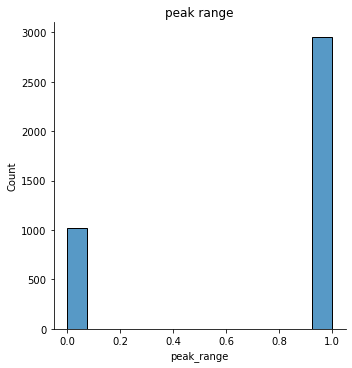

In [11]:
#distribution of peak range
sns.displot(mlapp['peak_range'])
plt.title('peak range')
plt.show()

With the histograms from above we can see the data is not normal so the MinMaxScaler will be used again. This histogram shows the data needs to be balanced as there are more in the range of 50-100 than 1-10.

Defining variables, undersampling and splitting to train and test

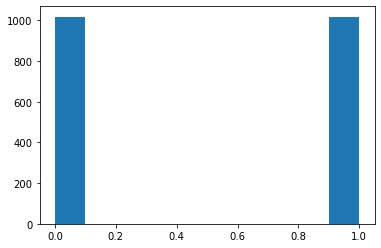

In [12]:
#set X and y
X = mlapp.drop(columns = 'peak_range')
y = mlapp['peak_range'].values.reshape(-1,1)
#create undersampled X and y
undersample = RandomUnderSampler(sampling_strategy = 'majority')
X_under, y_under = undersample.fit_resample(X,y)
plt.hist(y_under)
y_under = y_under.reshape(-1,1)
#split to train and test from undersampled X and y
X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size = 0.3, random_state = 42)

Scaling the data

In [13]:
from sklearn.preprocessing import MinMaxScaler
#set scaler
scaler = MinMaxScaler()
#scale data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

## KNN

Finding initial K as the square root of the number of entries

In [14]:
# to find k to use
import math
math.sqrt(len(y_test_scaled))
#use k=23

24.71841418861655

Creating and training model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# creating and training knn model
classifier = KNeighborsClassifier(n_neighbors =23, metric = 'euclidean')
#fit
classifier.fit(X_train_scaled, y_train)
classifier

C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=23)

Predicting with the model

In [14]:
#predict
y_kpred = classifier.predict(X_test_scaled)

Metrics: confusion matrix, F1 score, classification report

In [15]:
confusion_matrix(y_test, y_kpred)

array([[226,  84],
       [ 52, 249]], dtype=int64)

In [16]:
print(f1_score(y_test, y_kpred))

0.7854889589905362


In [17]:
#print classification report for k=23
print(classification_report(y_test_scaled, y_kpred))

              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77       310
         1.0       0.75      0.83      0.79       301

    accuracy                           0.78       611
   macro avg       0.78      0.78      0.78       611
weighted avg       0.78      0.78      0.78       611



### Finding and using optimal K

Testing multiple K values to find that with the lowest error rate

In [18]:
# best k
#empty list
error_rate =[]

for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors =i) #new classifier for each i
    knn.fit(X_train_scaled, y_train_scaled)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i!=y_test_scaled)) #find the error rate and append



C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWa

Plotting this data

Text(0, 0.5, 'Error Rate')

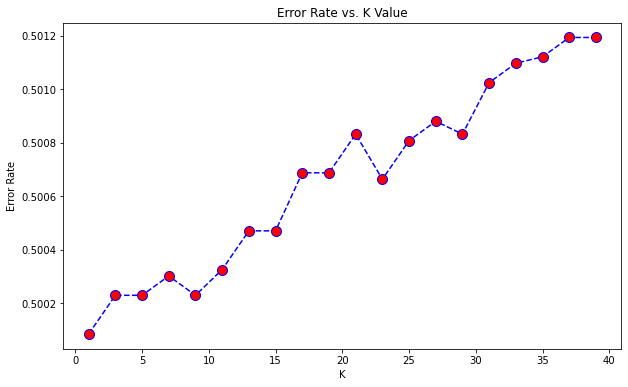

In [19]:
#plot the error rate for each K 
plt.figure(figsize = (10,6))
plt.plot(range(1,40,2), error_rate, color = 'b', linestyle = 'dashed', marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Using K=9 as this is the lowest error rate

In [97]:
# try with k=9
#define the classifier
classifieropt = KNeighborsClassifier(n_neighbors =9, metric = 'euclidean')

# Train classifier
classifieropt.fit(X_train_scaled, y_train_scaled)
classifieropt

C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=9)

Predicting with this model

In [98]:
#set the predictions
y_kopt_pred = classifieropt.predict(X_test_scaled)

Metrics: confusion matrix, F1 score

In [99]:
#print confusion matrix
confusion_matrix(y_test_scaled, y_kpred), confusion_matrix(y_test_scaled, y_kopt_pred)

(array([[226,  84],
        [ 52, 249]], dtype=int64),
 array([[208, 102],
        [101, 200]], dtype=int64))

In [100]:
#print f1 score
print(f1_score(y_test_scaled, y_kpred), f1_score(y_test_scaled, y_kopt_pred))

0.7854889589905362 0.6633499170812603


Use K=23 for cross validation as better than K=9

In [24]:
#find X and y scaled undersampled
X_under_scaled = scaler.fit_transform(X_under)
y_under_scaled = scaler.fit_transform(y_under).ravel()

In [25]:
#cross validation as above with F1 score and accuracy
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
score_mc = ['f1', 'accuracy']
score_knn = cross_validate(classifier, X_under_scaled, y_under_scaled, cv = cv, scoring = score_mc )

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
# making classifier object
rf = RandomForestClassifier(n_jobs = 1, random_state = 42)
# training classifier
rf.fit(X_train_scaled, y_train_scaled)
#predict
pred_rf = rf.predict(X_test_scaled)

C:\Users\JasmineAlbert\AppData\Local\Temp\ipykernel_548\3240788254.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled, y_train_scaled)


In [27]:
#print classification report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       310
           1       0.84      0.77      0.80       301

    accuracy                           0.82       611
   macro avg       0.82      0.81      0.81       611
weighted avg       0.82      0.82      0.81       611



In [28]:
#print confusion matrix
confusion_matrix(y_test_scaled, pred_rf)

array([[265,  45],
       [ 68, 233]], dtype=int64)

In [29]:
#print f1 score
print(f1_score(y_test_scaled, pred_rf))

0.8048359240069085


Cross validation

In [30]:
#find cross validation scores
score_rf = cross_validate(rf, X_under_scaled, y_under_scaled, cv = cv, scoring = score_mc )

## Decision trees

In [31]:
from sklearn.tree import DecisionTreeClassifier
#define classifier
dtree = DecisionTreeClassifier()
#train classifier
dtree.fit(X_train_scaled, y_train_scaled)
#predict
pred_dt = dtree.predict(X_test_scaled)

In [32]:
#print classification report
print(classification_report(y_test_scaled, pred_dt))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       310
         1.0       0.80      0.79      0.79       301

    accuracy                           0.80       611
   macro avg       0.80      0.80      0.80       611
weighted avg       0.80      0.80      0.80       611



In [33]:
#print confusion matrix
confusion_matrix(y_test_scaled, pred_dt)

array([[250,  60],
       [ 64, 237]], dtype=int64)

In [34]:
#print f1 score
print(f1_score(y_test_scaled, pred_dt))

0.7926421404682276


<function matplotlib.pyplot.show(close=None, block=None)>

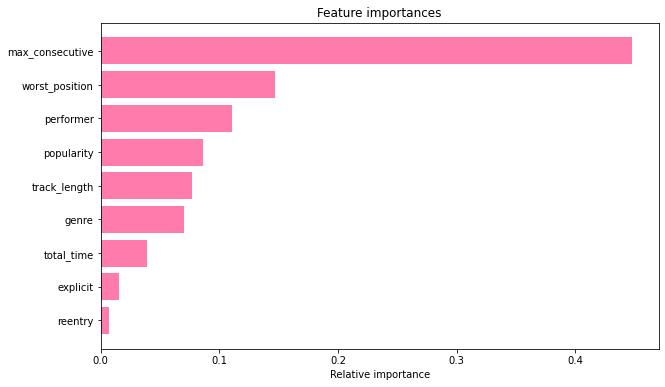

In [35]:
#create graph showing importance of each column
importances = dtree.feature_importances_
indices = np.argsort(importances)
fig, axes = plt.subplots(figsize = (10,6))
plt.title('Feature importances')
plt.barh(range(len(indices)),importances[indices],color='#ff7babff')
plt.yticks(range(len(indices)),[mlapp.columns[:-1][i] for i in indices])
plt.xlabel('Relative importance')
plt.show

In [36]:
#give cross validation scores
score_dt = cross_validate(dtree, X_under_scaled, y_under_scaled, cv = cv, scoring = score_mc )

### Create a dataframe with these scores

In [37]:
#assign values to list
f1_scores = [np.mean(score_knn['test_f1']), np.mean(score_rf['test_f1']), np.mean(score_dt['test_f1'])]
methods_class = ['KNN', 'Random Forest', 'Decision tree']
accur = [np.mean(score_knn['test_accuracy']), np.mean(score_rf['test_accuracy']), np.mean(score_dt['test_accuracy'])]

In [38]:
#create dataframe
class_eval = pd.DataFrame({
    'Classification Method': methods_class,
    'F1 Score': f1_scores,
    'Accuracy': accur
})

In [39]:
#show table
class_eval

,Classification Method,F1 Score,Accuracy
0,KNN,0.779402,0.765376
1,Random Forest,0.825455,0.831208
2,Decision tree,0.780813,0.783235


## Manually testing with new data

In [16]:
#import billboard api
import billboard
from billboard import ChartData

In [19]:
#create current chart
chart = billboard.ChartData('hot-100')

In [42]:
#find at position 66
chart[66].artist, chart[66].lastPos, chart[66].weeks

('Taylor Swift', 48, 5)

In [17]:
#importing spotify api
import spotipy
import string
import math
import os

In [26]:
#inputting username, client ID and client secret from spotify for developers
Username ='jasminealbert99'
Client_id ='6d87bd69d4f542f8a6ebe6b2d8bcaa9e'
Client_secret ='78f36215e5b044d4af724714c3885331'
scope = 'playlist-modify-public'
token =spotipy.SpotifyOAuth(client_id = Client_id, client_secret = Client_secret, redirect_uri ='http://localhost:3005/', scope = scope, username = Username)

In [27]:
#create spotify object
spotifyObject= spotipy.Spotify(auth_manager=token)

In [28]:
#result for song in hot 100
result = spotifyObject.search(q="you're on your own, kid taylor swift", offset=0, limit=1, type='track')

In [47]:
#creating test X and y, worst position assumed as current, genre and artist encoding found from above, weeks in chart as max
test_X = [969, 67,chart[88].weeks, chart[88].weeks,8, result['tracks']['items'][0]['duration_ms'], result['tracks']['items'][0]['explicit'], result['tracks']['items'][0]['popularity'], 12]
test_y = 0
test_X = np.reshape(test_X, (-1,1))

In [48]:
#scaling this data
test_X_scaled = scaler.fit_transform(test_X)
test_X_scaled = test_X_scaled.reshape(1,-1)
#predicting for each model
knn_new_pred = classifier.predict(test_X_scaled)
rf_new_pred = rf.predict(test_X_scaled)
dt_new_pred = dtree.predict(test_X_scaled)

In [49]:
#print predictions, all predicted correctly
print(knn_new_pred, rf_new_pred, dt_new_pred)

[0] [0.] [0.]


# Performing ML with no worst, total, max consecutive, and reentry

In [20]:
#removing data from billboard as this may not make sense to have in - many assumptions in above example
#creating X and y train and test new
X_train_new = X_train.drop(columns = ['worst_position', 'total_time', 'max_consecutive', 'reentry'])
y_train_new = y_train
X_test_new = X_test.drop(columns = ['worst_position', 'total_time', 'max_consecutive', 'reentry'])
y_test_new = y_test

In [21]:
from sklearn.preprocessing import MinMaxScaler
#set scaler
scaler = MinMaxScaler()
#scale data
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)
y_train_scaled = scaler.fit_transform(y_train_new)
y_test_scaled = scaler.transform(y_test_new)

## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# creating and training knn model
classifier_new = KNeighborsClassifier(n_neighbors =23, metric = 'euclidean')
#fit model
classifier_new.fit(X_train_scaled, y_train_scaled)
classifier_new

C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [23]:
#prediction
y_kpred_new = classifier_new.predict(X_test_scaled)

Metrics are confusion matrix, f1 score, accuracy and classification report

In [79]:
#confusion matrix
confusion_matrix(y_test, y_kpred_new)

array([[216,  94],
       [109, 192]], dtype=int64)

In [54]:
#F1 score, accuracy and classification report
print(f1_score(y_test, y_kpred_new), accuracy_score(y_test, y_kpred_new), classification_report(y_test, y_kpred_new))

0.6541737649063032 0.6677577741407529               precision    recall  f1-score   support

           0       0.66      0.70      0.68       310
           1       0.67      0.64      0.65       301

    accuracy                           0.67       611
   macro avg       0.67      0.67      0.67       611
weighted avg       0.67      0.67      0.67       611



In [55]:
# best k
#empty list
error_rate =[]

for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors =i) #new classifier for each i
    knn.fit(X_train_scaled, y_train_scaled)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i!=y_test_scaled)) #error rate with each classifier appended



C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWa

Text(0, 0.5, 'Error Rate')

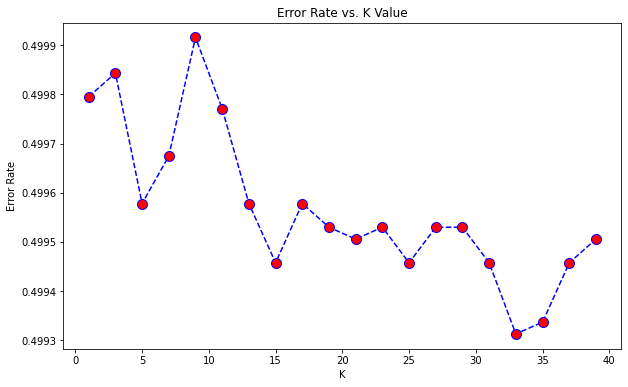

In [56]:
#plotting this data
plt.figure(figsize = (10,6))
plt.plot(range(1,40,2), error_rate, color = 'b', linestyle = 'dashed', marker = 'o', markerfacecolor = 'r', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Lowest at K=33

In [80]:
# try with k=33
#define the classifier
classifieropt_new = KNeighborsClassifier(n_neighbors =33, metric = 'euclidean')

# Train classifier
classifieropt_new.fit(X_train_scaled, y_train_scaled)
classifieropt_new

C:\Users\JasmineAlbert\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=33)

In [81]:
#set the predictions
y_kopt_pred_new = classifieropt_new.predict(X_test_scaled)

Metrics: F1 score, accuracy, confusion matrix

In [82]:
print(f1_score(y_test, y_kopt_pred_new), f1_score(y_test, y_kpred_new))

0.6574394463667821 0.6541737649063032


In [83]:
print(accuracy_score(y_test, y_kopt_pred_new), accuracy_score(y_test, y_kpred_new))

0.6759410801963993 0.6677577741407529


In [87]:
print(confusion_matrix(y_test, y_kopt_pred_new),'\n', confusion_matrix(y_test, y_kpred_new))

[[223  87]
 [111 190]] 
 [[216  94]
 [109 192]]


New is better

In [89]:
#new undersampled scaled data
X_under_scaled_new = scaler.fit_transform(X_under.drop(columns = ['worst_position', 'total_time', 'max_consecutive', 'reentry']))
y_under_scaled_new = scaler.fit_transform(y_under).ravel()

In [91]:
#cross validation as above
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
score_mc = ['f1', 'accuracy']
score_knn_new = cross_validate(classifieropt_new, X_under_scaled_new, y_under_scaled_new, cv = cv, scoring = score_mc )

## Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
# making classifier object
rf_new = RandomForestClassifier(n_jobs = 1, random_state = 42)
# training classifier
rf_new.fit(X_train_scaled, y_train_scaled)
#predict
pred_rf_new = rf_new.predict(X_test_scaled)

C:\Users\JasmineAlbert\AppData\Local\Temp\ipykernel_7720\2630015733.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_new.fit(X_train_scaled, y_train_scaled)


Metrics: F1 score, accuracy, confusion matrix

In [65]:
confusion_matrix(y_test, pred_rf_new)

array([[220,  90],
       [105, 196]], dtype=int64)

In [66]:
print(f1_score(y_test, pred_rf_new), accuracy_score(y_test, pred_rf_new))

0.667802385008518 0.6808510638297872


In [67]:
#finding the cross val scores
score_rf_new = cross_validate(rf_new, X_under_scaled_new, y_under_scaled_new, cv = cv, scoring = score_mc )

## Decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
#define classifier
dtree_new = DecisionTreeClassifier()
#train classifier
dtree_new.fit(X_train_scaled, y_train_scaled)
#predict
pred_dt_new = dtree_new.predict(X_test_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

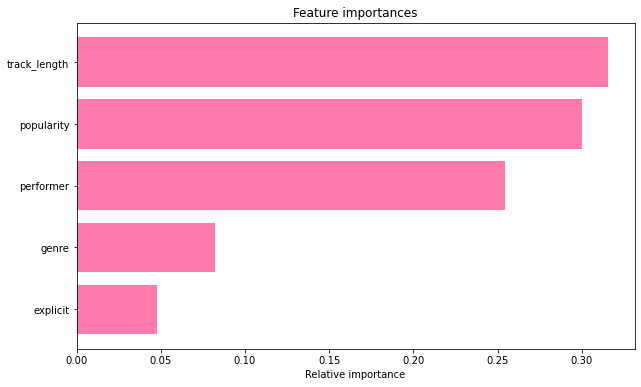

In [69]:
#create graph showing importance of each column
importances = dtree_new.feature_importances_
indices = np.argsort(importances)
fig, axes = plt.subplots(figsize = (10,6))
plt.title('Feature importances')
plt.barh(range(len(indices)),importances[indices],color='#ff7babff')
plt.yticks(range(len(indices)),[X_train_new.columns[:][i] for i in indices])
plt.xlabel('Relative importance')
plt.show

Metrics: F1 score, accuracy, confusion matrix

In [70]:
print(f1_score(y_test, pred_dt_new), accuracy_score(y_test, pred_dt_new))

0.6019417475728156 0.5973813420621932


In [92]:
confusion_matrix(y_test, pred_dt_new)

array([[179, 131],
       [115, 186]], dtype=int64)

In [71]:
#cross val score
score_dt_new = cross_validate(dtree_new, X_under_scaled_new, y_under_scaled_new, cv = cv, scoring = score_mc )

### Create table from these cross validation scores

In [93]:
#separate to lists
f1_scores_new = [np.mean(score_knn_new['test_f1']), np.mean(score_rf_new['test_f1']), np.mean(score_dt_new['test_f1'])]
methods_class_new = ['KNN', 'Random Forest', 'Decision tree']
accur_new = [np.mean(score_knn_new['test_accuracy']), np.mean(score_rf_new['test_accuracy']), np.mean(score_dt_new['test_accuracy'])]

In [94]:
#create dataframe
class_eval_new = pd.DataFrame({
    'Classification Method': methods_class_new,
    'F1 Score': f1_scores_new,
    'Accuracy': accur_new
})

In [95]:
#show dataframe
class_eval_new

,Classification Method,F1 Score,Accuracy
0,KNN,0.665540,0.670738
1,Random Forest,0.664547,0.671413
2,Decision tree,0.605443,0.601843


In [29]:
#testing with the same manually inputted data
test_X_new = [969, result['tracks']['items'][0]['duration_ms'], result['tracks']['items'][0]['explicit'], result['tracks']['items'][0]['popularity'], 12]
test_y_new = 0
test_X_new = np.reshape(test_X_new, (-1,1))

In [39]:
#scaling the new data
scaler = MinMaxScaler()
test_X_scaled = scaler.fit_transform(test_X_new)
test_X_scaled = test_X_scaled.reshape(1,-1)
#predicting with this inputted data
knn_new_pred = classifier_new.predict(test_X_scaled)
rf_new_pred = rf_new.predict(test_X_scaled)
dt_new_pred = dtree_new.predict(test_X_scaled)

In [41]:
#print the predictions
print(knn_new_pred, rf_new_pred, dt_new_pred)

[1.] [0.] [1.]


Only one got this correct: random forest

## End of code